# Obsah

## Uloha 1
University of Arizona was sued for sex discrimination. Its admission data showed that men applying to graduate school at Arizona were more likely to be admitted than women.The graduate schools had just accepted 44% of male applicants but only 35% of female applicants. The difference was so great that it was unlikely to be due to chance.
Experts analyzed the data set in detail and find out that discrimination has been carried in a way. Do you agree after analyzing the data set or you have a different conclusion? (Dataset: university.csv)

## Uloha 2
Analyze the Aircrash dataset and find out the following: (Dataset: Airplane_Crashes_Since_1908.csv)
- a.	Yearly how many planes crashed? How many people were on board? How many survived? How many died?
- b.	Highest number of crashes by operator and Type of aircrafts.
- c.	‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.
- d.	Find the number of crashed aircrafts and number of deaths against each category from above step.
- e.	Find any interesting trends/behaviors that you encounter when you analyze the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

## Uloha 1

In [2]:
df = pd.read_csv('inputs/university.csv')
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


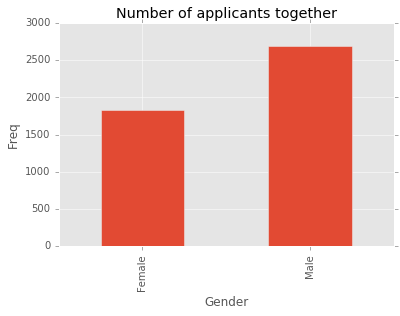

In [3]:
#possible status
pos_status = ['Rejected', 'Admitted']
# plot number of applicant
df_uni = df.groupby('Gender').sum()
df_uni.columns = ['applicants']
df_uni.plot(kind='bar', legend=False)
plt.ylabel('Freq')
plt.title('Number of applicants together')

In [4]:
# add status to frame
for stat in pos_status:
    df_uni[stat] = df[df['Admit']==stat].groupby('Gender').sum()

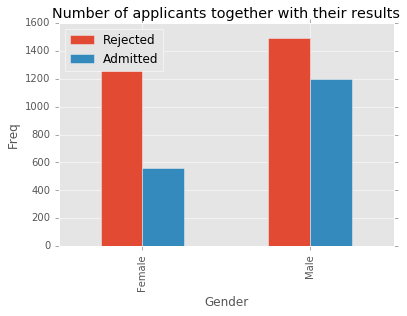

In [5]:
df_uni[pos_status].plot(kind='bar', legend=True)
plt.ylabel('Freq')
plt.title('Number of applicants together with their results')
plt.legend(loc=2)
plt.show()

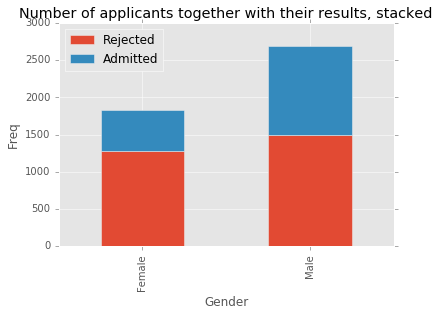

In [6]:
df_uni[pos_status].plot(kind='bar', legend=True, stacked=True)
plt.ylabel('Freq')
plt.title('Number of applicants together with their results, stacked')
plt.legend(loc=2)
plt.show()

In [7]:
for stat in pos_status:
    new_stat = stat + '(%)'
    df_uni[new_stat] = df_uni[stat] / df_uni['applicants'] * 100
df_uni

,applicants,Rejected,Admitted,Rejected(%),Admitted(%)
Gender,,,,,
Female,1835,1278,557,69.645777,30.354223
Male,2691,1493,1198,55.481234,44.518766


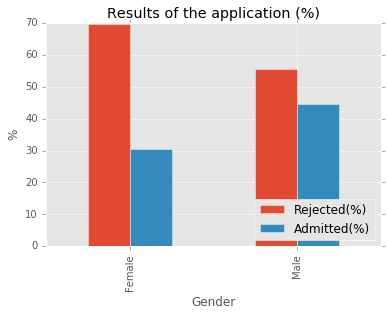

In [8]:
df_uni[['Rejected(%)', 'Admitted(%)']].plot(kind='bar', legend=True)
plt.ylabel('%')
plt.title('Results of the application (%)')
plt.legend(loc=4)
plt.show()

Pocet prijati a odmietnuti pre muzov a zeny.

In [9]:
df['gender_sum_bydept'] = df.groupby(['Gender', 'Dept']).transform(sum)['Freq']
df['perc'] = df['Freq'] / df['gender_sum_bydept']
df.head()

,Admit,Gender,Dept,Freq,gender_sum_bydept,perc
0,Admitted,Male,A,512,825,0.620606
1,Rejected,Male,A,313,825,0.379394
2,Admitted,Female,A,89,108,0.824074
3,Rejected,Female,A,19,108,0.175926
4,Admitted,Male,B,353,560,0.630357


In [30]:
df_bydept = df.groupby(['Gender', 'Dept']).first()
df_bydept

Admit  Freq  gender_sum_bydept      perc
Gender Dept                                             
Female A     Admitted    89                108  0.824074
       B     Admitted    17                 25  0.680000
       C     Admitted   202                593  0.340641
       D     Admitted   131                375  0.349333
       E     Admitted    94                393  0.239186
       F     Admitted    24                341  0.070381
Male   A     Admitted   512                825  0.620606
       B     Admitted   353                560  0.630357
       C     Admitted   120                325  0.369231
       D     Admitted   138                417  0.330935
       E     Admitted    53                191  0.277487
       F     Admitted    22                373  0.058981

In [48]:
unique_depts = df['Dept'].unique()
df_bydept_admitted = pd.DataFrame(index=unique_depts)
mask_male = (df['Gender'] == 'Male') & (df['Admit'] == 'Admitted')
mask_female = (df['Gender'] == 'Female') & (df['Admit'] == 'Admitted')
df_bydept_admitted['male_admitted'] = df[mask_male].set_index('Dept')['Freq']
df_bydept_admitted['female_admitted'] = df[mask_female].set_index('Dept')['Freq']
df_bydept_admitted['male_sum'] = df[mask_male].set_index('Dept')['gender_sum_bydept']
df_bydept_admitted['female_sum'] = df[mask_female].set_index('Dept')['gender_sum_bydept']
df_bydept_admitted

,male_admitted,female_admitted,male_sum,female_sum
A,512,89,825,108
B,353,17,560,25
C,120,202,325,593
D,138,131,417,375
E,53,94,191,393
F,22,24,373,341


Pocet prijati a odmietnuti jednotlivo pre vsetky oddelenia.

In [11]:
by_dept_all = pd.pivot_table(df, index=['Gender', 'Admit'], columns=['Dept'], values='Freq')
by_dept_all

Dept               A    B    C    D    E    F
Gender Admit                                 
Female Admitted   89   17  202  131   94   24
       Rejected   19    8  391  244  299  317
Male   Admitted  512  353  120  138   53   22
       Rejected  313  207  205  279  138  351

Celkovy pocet ziadosti pre jednotlive oddelenia podla pohlavia.

In [12]:
by_dept_sum = pd.pivot_table(df, index=['Gender'], columns=['Dept'], values='Freq', aggfunc=np.sum)
by_dept_sum

Dept,A,B,C,D,E,F
Gender,,,,,,
Female,108,25,593,375,393,341
Male,825,560,325,417,191,373


In [13]:
print(df.groupby(['Gender', 'Admit']).sum().reset_index())

   Gender     Admit  Freq
0  Female  Admitted   557
1  Female  Rejected  1278
2    Male  Admitted  1198
3    Male  Rejected  1493


In [14]:
by_dept_all.apply(lambda x: x[['A', 'B']]/2, axis=1)

Dept                 A      B
Gender Admit                 
Female Admitted   44.5    8.5
       Rejected    9.5    4.0
Male   Admitted  256.0  176.5
       Rejected  156.5  103.5

In [15]:
by_dept_all


Dept               A    B    C    D    E    F
Gender Admit                                 
Female Admitted   89   17  202  131   94   24
       Rejected   19    8  391  244  299  317
Male   Admitted  512  353  120  138   53   22
       Rejected  313  207  205  279  138  351

In [16]:
df.groupby(['Gender', 'Dept']).sum()

Freq
Gender Dept      
Female A      108
       B       25
       C      593
       D      375
       E      393
       F      341
Male   A      825
       B      560
       C      325
       D      417
       E      191
       F      373

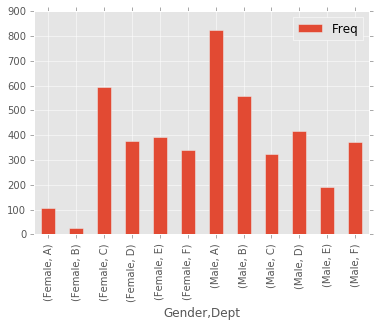

In [17]:
df.groupby(['Gender', 'Dept']).sum().plot.bar()

In [18]:
df.groupby(['Gender', 'Dept']).sum().reset_index()
df.merge(df.groupby(['Gender', 'Dept']).sum().reset_index())

,Admit,Gender,Dept,Freq,gender_sum_bydept,perc
